## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
# your code here
data = pd.read_csv('german_credit.csv', sep = ',')
data

FileNotFoundError: [Errno 2] No such file or directory: 'german_credit.csv'

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [70]:
# your code here
data.isna().any()
data['status'].unique() # порядковый признак, так как 4 категории, можно расставить позиции в приоритете
data['duration'].unique() # количественный признак
data['credit_history'].unique() # категориальный признак, так как 4 категории, нельзя поставить в приоритет что-либо
data['purpose'].unique() # категориальный признак, так как 10 категорий, нельзя поставить в приоритет что-либо
data['amount'].unique() # количественный признак
data['savings'].unique() # порядковый признак, так как 5 категорий, можно расставить позиции в приоритете
data['employment_duration'].unique() # порядковый признак, так как можно расставить позиции в приоритете
data['installment_rate'].unique() # порядковый признак, так как можно расставить позиции в приоритете
data['other_debtors'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['personal_status_sex'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['present_residence'].unique() # порядковый признак, так как можно расставить позиции в приоритете
data['property'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['age'].unique() # количественный признак
data['other_installment_plans'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['housing'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['number_credits'].unique() # порядковый признак, так как можно расставить позиции в приоритете
data['job'].unique() # категориальный признак, так как нельзя поставить в приоритет что-либо
data['people_liable'].unique() # бинарный признак, так как 2 категории
data['telephone'].unique() # бинарный признак, так как 2 категории
data['credit_risk'].unique() # бинарный признак, так как 2 категории

array(['good', 'bad'], dtype=object)

In [1]:
data['credit_history'].unique()

NameError: name 'data' is not defined

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [71]:
data[['purpose', 'amount']].groupby('purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [72]:
# your code here
round(data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0]/data.shape[0], 2)*100

25.0

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [73]:
# your code here
datan = data.loc[data['number_credits'] != '1']
datan[(datan['foreign_worker'] == 'yes') & (datan['number_credits'] != '2-3')].shape[0]

1

### Задание 6 (1 балл)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

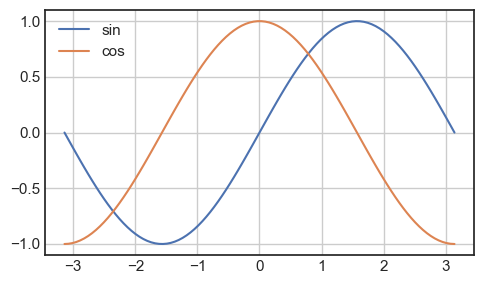

In [80]:
# your code here
x = np.linspace(-1*np.pi,np.pi, 100)
y = np.sin(x)
c = np.cos(x)
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='sin')
plt.plot(x, c, label='cos')
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

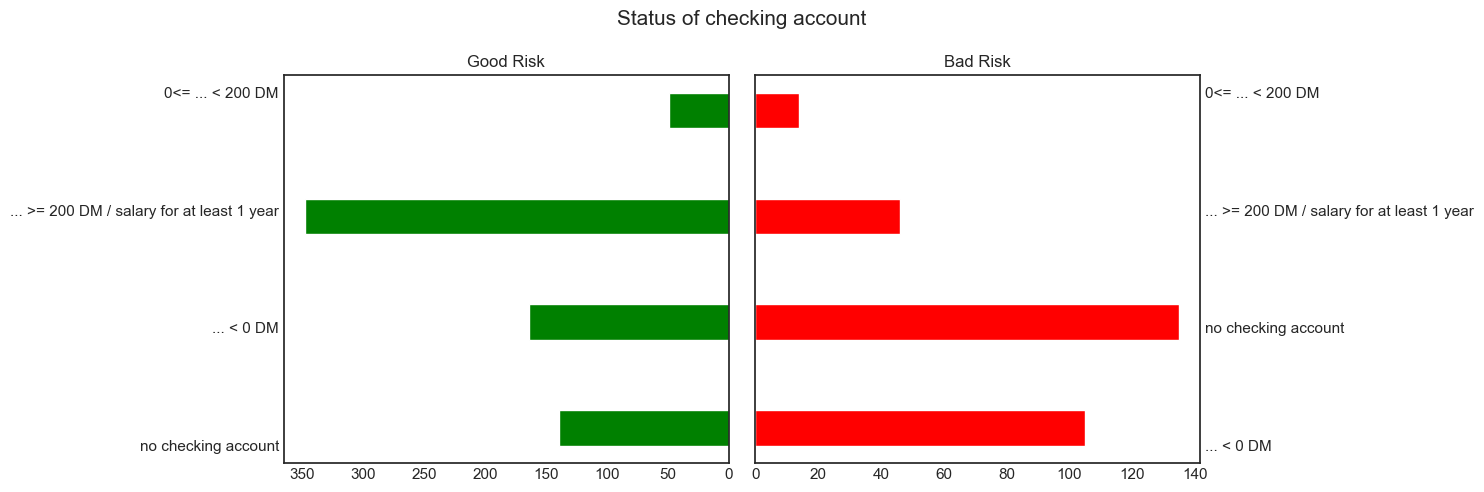

In [82]:
# your code here
plt.style.use('seaborn-white')
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Status of checking account', fontsize=15)

ax1.hist(good['status'], color = 'green', orientation = 'horizontal')
ax1.set_title('Good Risk')
ax1.set_xlim(ax1.get_xlim()[::-1])


ax2.hist(bad['status'], color = 'red', orientation = 'horizontal')
ax2.set_title('Bad Risk')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

fig.tight_layout()
#больше всего риск невыплаты кредита в случае, когда человек не проверяет аккаунт
#больше всего шанс того что человек выплатит кредит в случае >200 DM / salary for at least 1 year

### Задание 8  (0.5 балла)

In [83]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

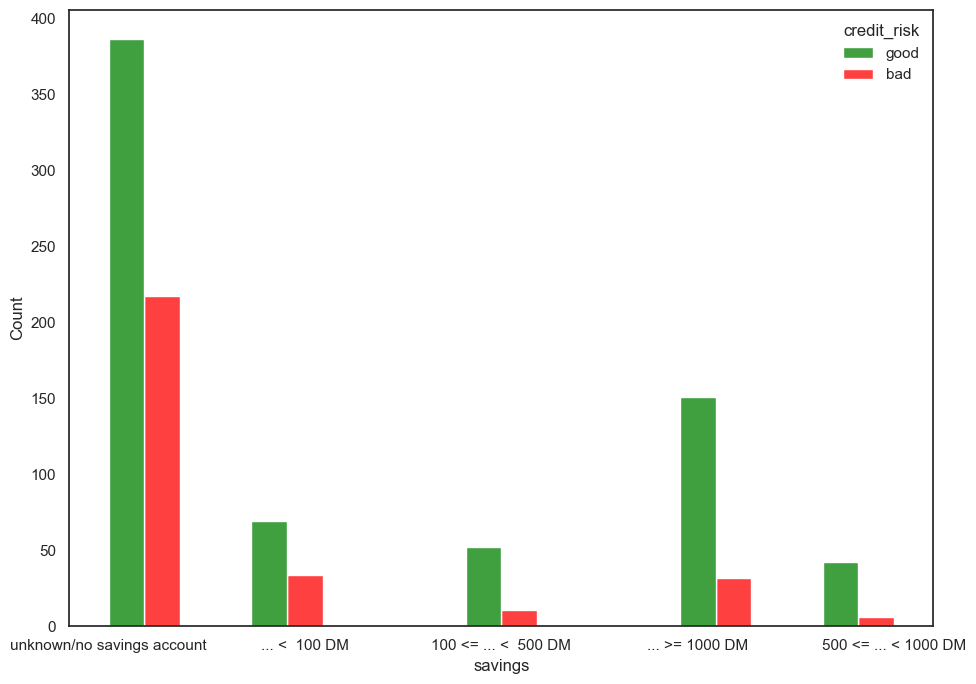

In [85]:
# your code here
palette = sns.color_palette(['green', 'red'])
sns.set_style(style= 'white')
g = sns.histplot(data=data, x="savings", hue = "credit_risk", multiple='dodge', palette = palette, discrete = False)
sns.set(rc = {'figure.figsize':(10, 8)})
#больше всего шанс не выплатиты кредита в случае 100<=...<500DM
#больше всего шанс выплатить кредиты в случае unknown/no savings account

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

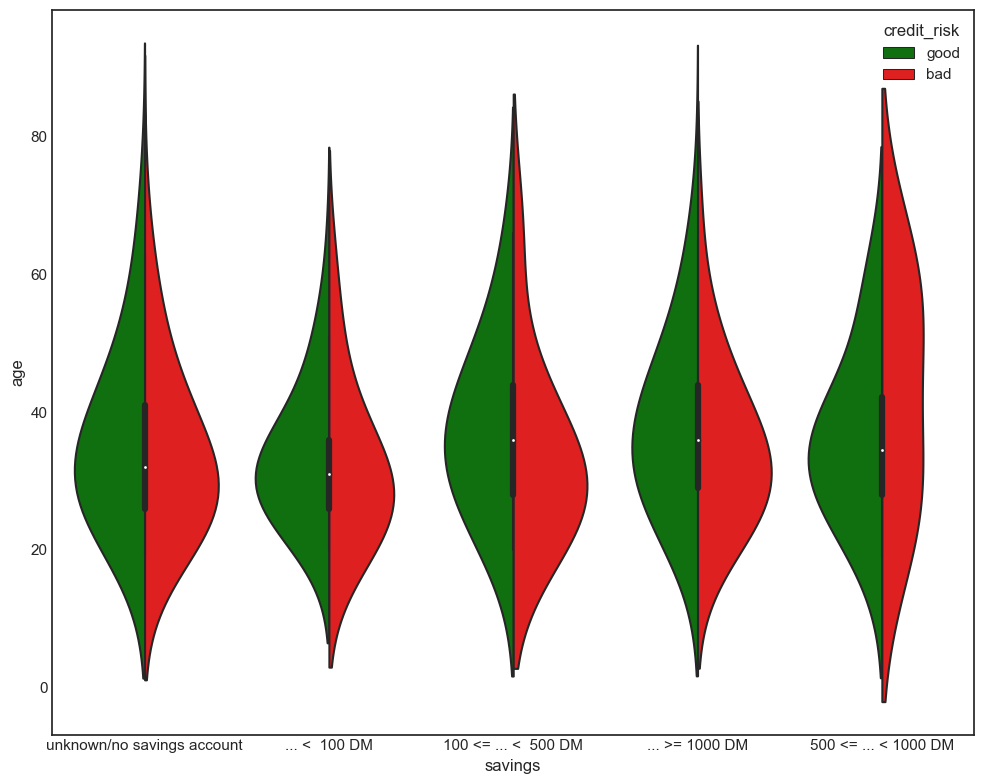

In [88]:
# your code here
plt.style.use('seaborn-white')
sns.violinplot(data=data, x = 'savings', y = 'age', hue = 'credit_risk', palette = palette, split = True, bw = 0.8)
#в среднем больше всего шанс не выплатить кредит у молодых, а особенно у тех, у кого savings ...>=1000 DM

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

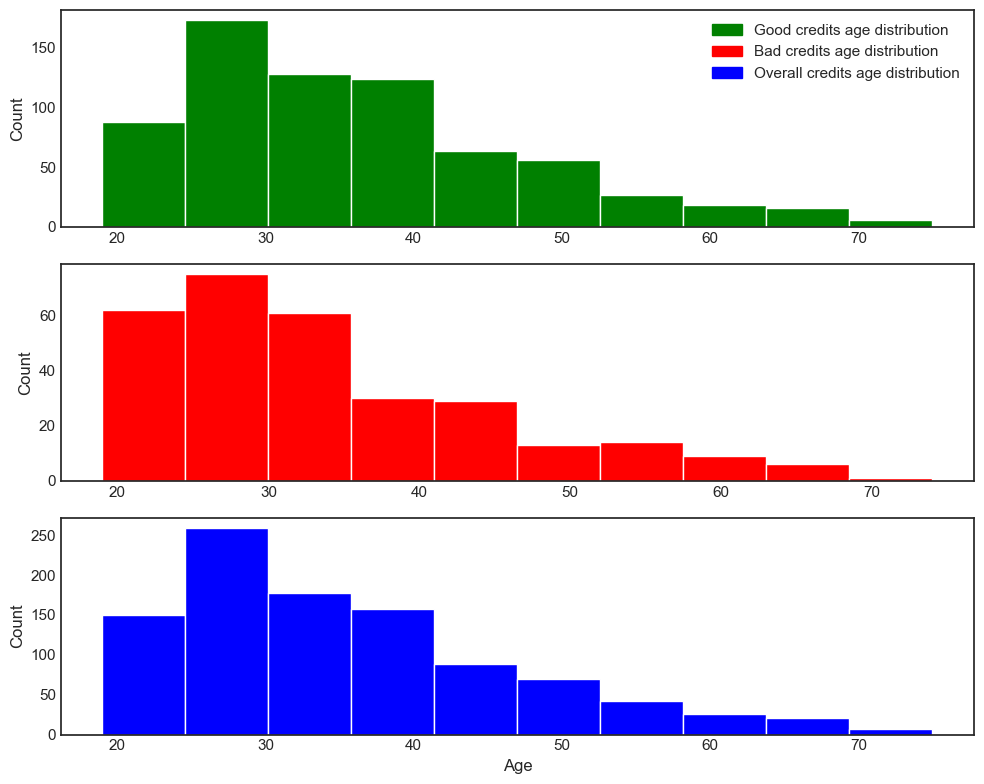

In [89]:
# your code here
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 1)


good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

goodage = sorted(list(set(good['age'])))
goodweights = list(good.groupby('age').count()['credit_risk'])

badage = sorted(list(set(bad['age'])))
badweights = list(bad.groupby('age').count()['credit_risk'])

age = sorted(list(set(data['age'])))
weights = list(data.groupby('age').count()['credit_risk'])

a = plt.figure()

ax2 = plt.subplot(gs[1, 0])
ax2.hist(badage, weights = badweights, color = 'red', label = 'Bad credits age distribution')
plt.ylabel('Count')

ax3 = plt.subplot(gs[2, 0])
ax3.hist(age, weights = weights, color = 'blue', label = 'Overall credits age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

good_label = mpatches.Patch(color='green', label='Good credits age distribution')
bad_label = mpatches.Patch(color='red', label='Bad credits age distribution')
neutral_label = mpatches.Patch(color='blue', label='Overall credits age distribution')

ax1 = plt.subplot(gs[0, 0])
ax1.hist(goodage, weights = goodweights, color = 'green', label = 'Good credits age distribution')
plt.ylabel('Count')
plt.legend(handles=[good_label, bad_label, neutral_label], loc='upper right')

plt.show()
#чаще всего выплачивают кредиты люди примерно 25-30 лет
#чаще всего не выплачивают кредиты люди примерно 25-30 лет
#в среднем берут кредиты люди 25-30 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

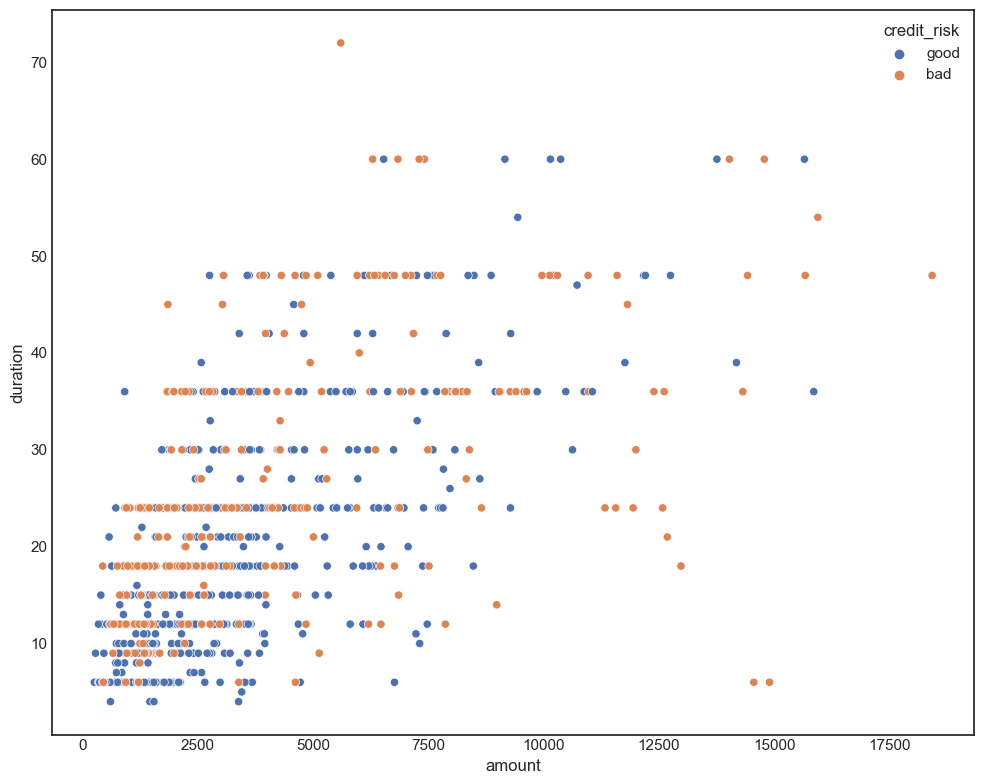

In [90]:
# your code here
sns.scatterplot(data = data, x = data['amount'], y = data['duration'], hue = 'credit_risk')
#чаще всего недолгая продолжительность и кредиты в маленьком размере означают невыплату кредита

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

C:\Users\79261\AppData\Local\Temp\ipykernel_2936\2898200138.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'Age')

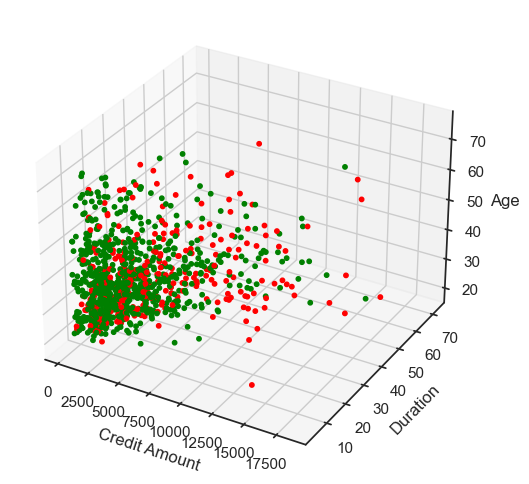

In [91]:
from matplotlib.colors import ListedColormap
data['credit_risk'] = data['credit_risk'].map({'bad': 'red', 'good': 'green'})

plt.rcParams["figure.figsize"] = [5, 10.50]
plt.rcParams["figure.autolayout"] = True

x = data['amount']
y = data['duration']
z = data['age']

red = np.array(["red" for x in range(500)])
green = np.array(["green" for x in range(500)])
cn = np.array(data['credit_risk'])

fig = plt.figure()
ax = fig.gca(projection='3d')
sc = ax.scatter(x, y, z, s=10, c=cn, marker='o', alpha=1)

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

#чаще всего выплачивают кредиты молодые люди в возрасте 20-40 лет, которые взяли кредит в маленьком размере на короткий срок


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [92]:
# your code here

data
n = data.drop(['duration', 
           'credit_history', 
           'purpose', 
           'amount',
           'personal_status_sex',
           'other_debtors',
           'present_residence',
           'property',
           'age',
           'other_installment_plans',
           'housing', 
           'job', 
           'foreign_worker'], axis = 1)
    
n['status'] = n['status'].map({'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3})
n['savings'] = n['savings'].map({'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4})
n['employment_duration'] = n['employment_duration'].map({'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4})
n['installment_rate'] = n['installment_rate'].map({'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35':2, '>= 35': 3})
n['number_credits'] = n['number_credits'].map({'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3})
n['people_liable'] = n['people_liable'].map({'0 to 2': 0, '3 or more': 1})
n['telephone'] = n['telephone'].map({'no': 0, 'yes (under customer name)': 1})
n['credit_risk'] = n['credit_risk'].map({'red': 0, 'green': 1})
n

,status,savings,employment_duration,installment_rate,number_credits,people_liable,telephone,credit_risk
0,0,0,1,0,0,0,0,1
1,0,0,2,2,1,1,0,1
2,1,1,3,2,0,0,0,1
3,0,0,2,1,1,1,0,1
4,0,0,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...
995,0,0,2,2,0,1,0,0
996,0,0,4,0,0,0,0,0
997,3,4,4,0,0,0,1,0
998,1,4,0,2,0,0,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [93]:
def predict(X_test):
    a = []
    for i in X_test:
        if i[5] == 0:
            a.append(1)
        else:
            a.append(0)
    return a

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = n.drop('credit_risk', 1).values
y = n['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\79261\AppData\Local\Temp\ipykernel_2936\1745200693.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = n.drop('credit_risk', 1).values


0.6

<AxesSubplot:>

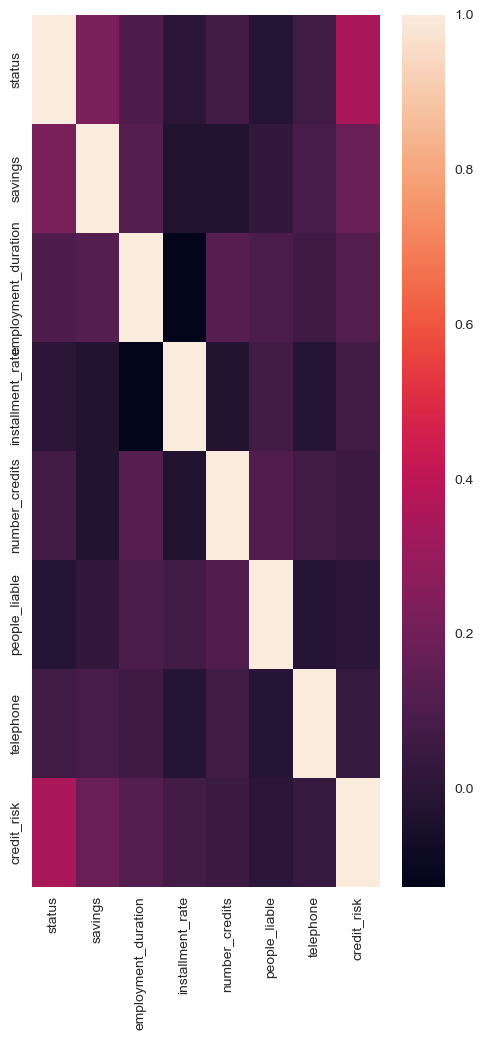

In [316]:
sns.heatmap(n.corr())